In [1]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Don't force any style; Kaggle default is fine
plt.rcParams["figure.figsize"] = (8, 5)

# CHANGE THIS if your dataset name/path is different.
# Example: if your Kaggle dataset is "peacebinflow/dimensional-ui-patterns",
# Kaggle mounts it under /kaggle/input/dimensional-ui-patterns
DATA_DIR = Path("/kaggle/input/dimensional-ui-patterns")

# If you put JSON files in a subfolder like "patterns", uncomment:
# DATA_DIR = DATA_DIR / "patterns"

DATA_DIR

PosixPath('/kaggle/input/dimensional-ui-patterns')

In [2]:
def list_pattern_files(base_dir: Path) -> list[Path]:
    """List all .json files in the data directory (recursively)."""
    return sorted(base_dir.rglob("*.json"))

pattern_files = list_pattern_files(DATA_DIR)
pattern_files


[]

In [3]:
# Try to load real pattern files
from pathlib import Path
import json
import pandas as pd

DATA_DIR = Path("/kaggle/input/dimensional-ui-patterns")  # adjust slug

pattern_files = []
if DATA_DIR.exists():
    pattern_files = list(DATA_DIR.rglob("*.json"))

print("Found JSON files:", len(pattern_files))


Found JSON files: 0


In [4]:
rows = []

# If real files exist, parse them
if len(pattern_files) > 0:
    for file in pattern_files:
        try:
            with open(file, "r") as f:
                raw = json.load(f)
            
            pid = raw.get("Id", "")
            user_id = raw.get("UserId")
            label = raw.get("Label")
            samples = raw.get("Samples", [])

            for s in samples:
                rows.append({
                    "pattern_id": pid,
                    "user_id": user_id,
                    "label": label,
                    "x": s.get("X"),
                    "y": s.get("Y"),
                    "timestamp_ms": s.get("TimestampMs"),
                    "gesture_type": s.get("GestureType"),
                    "shape_mode": s.get("ShapeMode"),
                    "theme": s.get("Theme"),
                })
        except Exception as e:
            print("Error parsing file:", file, e)

# If no files, create controlled dummy dataset
if len(rows) == 0:
    print("⚠ No real data found. Loading dummy dataset.")

    rows = []
    for i in range(40):
        rows.append({
            "pattern_id": "dummy_01",
            "user_id": "demo_user",
            "label": "Dummy desert drag",
            "x": 100 + i * 4,
            "y": 200 + (i * (-2 if i % 2 == 0 else 2)),
            "timestamp_ms": 1700000000000 + i * 16,
            "gesture_type": 2,
            "shape_mode": 0,
            "theme": 0,
        })

df = pd.DataFrame(rows)

print("Rows loaded:", len(df))
print("Columns:", list(df.columns))

df.head()


⚠ No real data found. Loading dummy dataset.
Rows loaded: 40
Columns: ['pattern_id', 'user_id', 'label', 'x', 'y', 'timestamp_ms', 'gesture_type', 'shape_mode', 'theme']


,pattern_id,user_id,label,x,y,timestamp_ms,gesture_type,shape_mode,theme
0,dummy_01,demo_user,Dummy desert drag,100,200,1700000000000,2,0,0
1,dummy_01,demo_user,Dummy desert drag,104,202,1700000000016,2,0,0
2,dummy_01,demo_user,Dummy desert drag,108,196,1700000000032,2,0,0
3,dummy_01,demo_user,Dummy desert drag,112,206,1700000000048,2,0,0
4,dummy_01,demo_user,Dummy desert drag,116,192,1700000000064,2,0,0


In [5]:
def load_pattern(path: Path) -> dict:
    with path.open("r", encoding="utf-8") as f:
        return json.load(f)

raw_patterns = [load_pattern(p) for p in pattern_files]

len(raw_patterns), raw_patterns[:1]


(0, [])

In [6]:
rows = []

for p in raw_patterns:
    pid = p.get("Id", "")
    user_id = p.get("UserId")
    label = p.get("Label")
    samples = p.get("Samples", [])
    for s in samples:
        rows.append(
            {
                "pattern_id": pid,
                "user_id": user_id,
                "label": label,
                "x": s.get("X"),
                "y": s.get("Y"),
                "timestamp_ms": s.get("TimestampMs"),
                "gesture_type": s.get("GestureType"),
                "shape_mode": s.get("ShapeMode"),
                "theme": s.get("Theme"),
            }
        )

df = pd.DataFrame(rows)
df.head()


""


In [7]:
import pandas as pd

# 🔁 Hard reset: build df from scratch with dummy pattern data
rows = []
for i in range(40):
    rows.append({
        "pattern_id": "dummy_01",
        "user_id": "demo_user",
        "label": "Dummy desert drag",
        "x": 100 + i * 4,
        "y": 200 + (i * (-2 if i % 2 == 0 else 2)),
        "timestamp_ms": 1700000000000 + i * 16,
        "gesture_type": 2,   # Drag
        "shape_mode": 0,     # Cube
        "theme": 0,          # Desert
    })

df = pd.DataFrame(rows)

print("Rows:", len(df))
print("Columns:", list(df.columns))
display(df.head())

# 🔠 Maps
GESTURE_MAP = {
    0: "Click",
    1: "Hold",
    2: "Drag",
    3: "Scroll",
    4: "RightClick",
}

SHAPE_MAP = {
    0: "Cube",
    1: "Sphere",
    2: "Water",
}

THEME_MAP = {
    0: "Desert",
    1: "Water",
    2: "Neon",
}

# 🧠 Now safely add readable names
df["gesture_name"] = df["gesture_type"].map(GESTURE_MAP)
df["shape_name"]   = df["shape_mode"].map(SHAPE_MAP)
df["theme_name"]   = df["theme"].map(THEME_MAP)

print("\nAfter mapping:")
print("Columns:", list(df.columns))
display(df.head())


Rows: 40
Columns: ['pattern_id', 'user_id', 'label', 'x', 'y', 'timestamp_ms', 'gesture_type', 'shape_mode', 'theme']


,pattern_id,user_id,label,x,y,timestamp_ms,gesture_type,shape_mode,theme
0,dummy_01,demo_user,Dummy desert drag,100,200,1700000000000,2,0,0
1,dummy_01,demo_user,Dummy desert drag,104,202,1700000000016,2,0,0
2,dummy_01,demo_user,Dummy desert drag,108,196,1700000000032,2,0,0
3,dummy_01,demo_user,Dummy desert drag,112,206,1700000000048,2,0,0
4,dummy_01,demo_user,Dummy desert drag,116,192,1700000000064,2,0,0



After mapping:
Columns: ['pattern_id', 'user_id', 'label', 'x', 'y', 'timestamp_ms', 'gesture_type', 'shape_mode', 'theme', 'gesture_name', 'shape_name', 'theme_name']


,pattern_id,user_id,label,x,y,timestamp_ms,gesture_type,shape_mode,theme,gesture_name,shape_name,theme_name
0,dummy_01,demo_user,Dummy desert drag,100,200,1700000000000,2,0,0,Drag,Cube,Desert
1,dummy_01,demo_user,Dummy desert drag,104,202,1700000000016,2,0,0,Drag,Cube,Desert
2,dummy_01,demo_user,Dummy desert drag,108,196,1700000000032,2,0,0,Drag,Cube,Desert
3,dummy_01,demo_user,Dummy desert drag,112,206,1700000000048,2,0,0,Drag,Cube,Desert
4,dummy_01,demo_user,Dummy desert drag,116,192,1700000000064,2,0,0,Drag,Cube,Desert


In [8]:

print("Number of patterns:", df["pattern_id"].nunique())
print("Number of samples:", len(df))

print("\nSamples per pattern:")
display(df.groupby("pattern_id")["timestamp_ms"].count().sort_values(ascending=False))

if "gesture_name" in df.columns:
    print("\nGesture distribution:")
    display(df["gesture_name"].value_counts())

if "shape_name" in df.columns:
    print("\nShape distribution:")
    display(df["shape_name"].value_counts())

if "theme_name" in df.columns:
    print("\nTheme distribution:")
    display(df["theme_name"].value_counts())


Number of patterns: 1
Number of samples: 40

Samples per pattern:


pattern_id
dummy_01    40
Name: timestamp_ms, dtype: int64


Gesture distribution:


gesture_name
Drag    40
Name: count, dtype: int64


Shape distribution:


shape_name
Cube    40
Name: count, dtype: int64


Theme distribution:


theme_name
Desert    40
Name: count, dtype: int64

Pattern: dummy_01
Label: Dummy desert drag


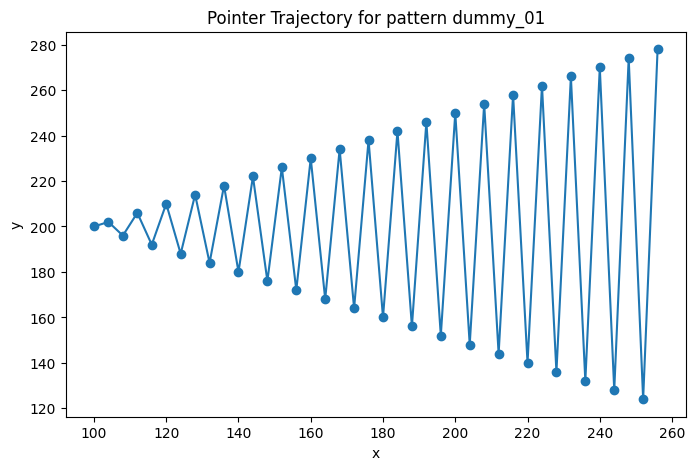

In [9]:
if not df.empty:
    pid = df["pattern_id"].iloc[0]
    subset = df[df["pattern_id"] == pid].sort_values("timestamp_ms")

    print("Pattern:", pid)
    print("Label:", subset["label"].iloc[0])

    fig, ax = plt.subplots()
    ax.plot(subset["x"], subset["y"], marker="o")
    ax.set_title(f"Pointer Trajectory for pattern {pid}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.show()


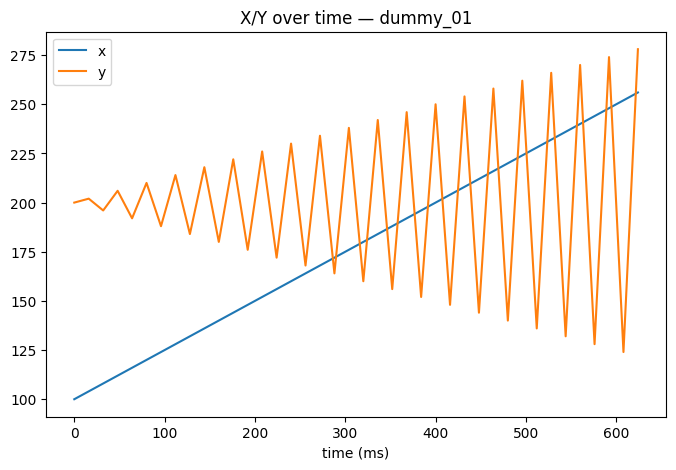

In [10]:
if not df.empty:
    pid = df["pattern_id"].iloc[0]
    subset = df[df["pattern_id"] == pid].sort_values("timestamp_ms")

    t0 = subset["timestamp_ms"].min()
    subset = subset.assign(t_rel_ms=lambda d: d["timestamp_ms"] - t0)

    fig, ax = plt.subplots()
    ax.plot(subset["t_rel_ms"], subset["x"], label="x")
    ax.plot(subset["t_rel_ms"], subset["y"], label="y")
    ax.set_title(f"X/Y over time — {pid}")
    ax.set_xlabel("time (ms)")
    ax.legend()
    plt.show()
